# Ожидаемая продолжительность жизни
Нужно выявить факторы, в наибольшей степени влияющие на ожидаемую продолжительность жизни в РФ

![Ожидаемая продолжительность жизни при рождении](life_expectancy_CIA_factbook.png)<br>
Задача решалась в рамках хакатона - Лидеры цифровойтрансформации

### Подключение библиотек

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression,mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
def linear_extrapolation (x):
    X = np.array(x.dropna().index.astype(int)).reshape(-1, 1)
    Y = np.array(x.dropna().values).reshape(-1, 1)
    if X.shape[0] > 0:
        f = LinearRegression().fit(X, Y)
        for i in x.index:
            v = x.loc[i]
            if v != v:
                v = f.predict([[int(i)]])[0][0]
                if v < 0:
                    v = 0
                x.loc[i] = v
    return x

### Загрузка данных

In [3]:
data = pd.read_csv("https://video.ittensive.com/machine-learning/sc-tatar2020/rosstat/rosstat.csv",
                   na_values=["-", " - ","...","…"," -"])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feature  479 non-null    object 
 1   2000     350 non-null    float64
 2   2001     352 non-null    float64
 3   2002     362 non-null    float64
 4   2003     362 non-null    float64
 5   2004     384 non-null    float64
 6   2005     412 non-null    float64
 7   2006     413 non-null    float64
 8   2007     418 non-null    float64
 9   2008     414 non-null    float64
 10  2009     414 non-null    float64
 11  2010     434 non-null    float64
 12  2011     432 non-null    float64
 13  2012     439 non-null    float64
 14  2013     445 non-null    float64
 15  2014     451 non-null    float64
 16  2015     456 non-null    float64
 17  2016     456 non-null    float64
 18  2017     444 non-null    float64
 19  2018     436 non-null    float64
 20  2019     21 non-null     float64
dtypes: float64(20), 

In [5]:
data.head()

,feature,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.1. ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ (на конец года),56178.0,62575.0,68176.0,75824.0,81733.0,89769.000000,89732.000000,93338.000000,100729.000000,...,104469.000000,103545.000000,108073.000000,114717.000000,120565.000000,128199.0,130808.0,117616.0,117334.000000,NaN
1,ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов рублей),NaN,NaN,NaN,NaN,NaN,752.387761,911.175828,1214.257908,1494.829045,...,1795.978998,2374.320191,2615.157789,2668.600732,2871.388393,3123.0,3420.0,3826.4,4379.528606,NaN
2,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.900000,47.900000,49.600000,48.800000,NaN,74.6,75.1,72.754000,NaN
3,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,121.000000,125.000000,129.000000,127.000000,NaN,192.0,193.0,186.614368,NaN
4,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.3. Среднесписочная численность работников (без внешних совместителей),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,324.000000,332.000000,330.400000,330.600000,NaN,332.5,332.6,337.440000,NaN


### Очистка данных
Линейно интерполируем пропуски, а затем запомним названия факторов - столбцов исходного набора данных - и транспонируем данные

In [6]:
features = data["feature"]#запоминаем значения первого столбца
data.drop(labels=["feature"], inplace=True, axis=1)# удаляем первый столбец
data.interpolate(method="linear", axis=1, inplace=True)

In [7]:
data = data.apply(linear_extrapolation, axis=1, result_type="expand")

In [8]:
#data = data.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
data.dropna(inplace=True)
data["feature"] = features
data.head(10)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,feature
0,56178.000000,62575.000000,68176.000000,75824.000000,81733.000000,89769.000000,89732.000000,93338.000000,100729.000000,103246.000000,...,103545.000000,108073.000000,114717.000000,120565.000000,128199.00,130808.0,117616.0,117334.000000,117334.000000,ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.1. ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ (на конец года)
1,0.000000,0.000000,0.000000,101.108969,366.372259,752.387761,911.175828,1214.257908,1494.829045,1500.624925,...,2374.320191,2615.157789,2668.600732,2871.388393,3123.00,3420.0,3826.4,4379.528606,4379.528606,ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов рублей)
2,0.000000,0.630467,4.943433,9.256400,13.569367,17.882333,22.195300,26.508267,30.821233,35.134200,...,45.900000,47.900000,49.600000,48.800000,61.70,74.6,75.1,72.754000,72.754000,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий
3,0.000000,8.344170,19.015846,29.687522,40.359198,51.030875,61.702551,72.374227,83.045904,93.717580,...,121.000000,125.000000,129.000000,127.000000,159.50,192.0,193.0,186.614368,186.614368,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения
4,312.963889,314.236889,315.509889,316.782889,318.055889,319.328889,320.601889,321.874889,323.147889,324.420889,...,324.000000,332.000000,330.400000,330.600000,331.55,332.5,332.6,337.440000,337.440000,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.3. Среднесписочная численность работников (без внешних совместителей)
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.273906,104.640559,201.007212,297.373865,...,504.400000,622.900000,707.300000,729.400000,843.65,957.9,964.5,1275.057026,1275.057026,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.4. Оборот малых предприятий
6,13.087879,16.461818,19.835758,23.209697,26.583636,29.957576,33.331515,36.705455,40.079394,43.453333,...,47.360000,53.220000,59.080000,64.940000,70.80,70.8,70.8,70.800000,70.800000,"12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.1. Число малых предприятий в 2010, 2015 гг."
7,38.327273,46.790909,55.254545,63.718182,72.181818,80.645455,89.109091,97.572727,106.036364,114.500000,...,124.300000,139.000000,153.700000,168.400000,183.10,183.1,183.1,183.100000,183.100000,"12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.2. Число малых предприятий на 10 000 человек населения в 2010, 2015 гг."
8,298.918182,298.987273,299.056364,299.125455,299.194545,299.263636,299.332727,299.401818,299.470909,299.540000,...,299.620000,299.740000,299.860000,299.980000,300.10,300.1,300.1,300.100000,300.100000,"12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.3. Среднесписочная численность работников (без внешних совместителей) в 2010, 2015 гг."
9,0.000000,0.000000,0.000000,0.000000,79.856364,160.209091,240.561818,320.914545,401.267273,481.620000,...,574.660000,714.220000,853.780000,993.340000,1132.90,1132.9,1132.9,1132.900000,1132.900000,"12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.4. Выручка от реализации товаров (работ, услуг) малых предприятий в 2010, 2015 гг."


In [9]:
features = np.array(data["feature"])
data = data.T[:len(data.columns)-1].astype("float")
data.drop(labels=["2019"], inplace=True)
data.columns = features
data.head(10)

,ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.1. ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ (на конец года),ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов рублей),12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.3. Среднесписочная численность работников (без внешних совместителей),12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.4. Оборот малых предприятий,"12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.1. Число малых предприятий в 2010, 2015 гг.","12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.2. Число малых предприятий на 10 000 человек населения в 2010, 2015 гг.","12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.3. Среднесписочная численность работников (без внешних совместителей) в 2010, 2015 гг.","12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.4. Выручка от реализации товаров (работ, услуг) малых предприятий в 2010, 2015 гг.",...,4.22. ЧИСЛО ФИЛИАЛОВ ОБРАЗОВАТЕЛЬНЫХ ОРГАНИЗАЦИЙ ВЫСШЕГО ОБРАЗОВАНИЯ (на начало учебного года),"4.23. ЧИСЛЕННОСТЬ ПРОФЕССОРСКО-ПРЕПОДАВАТЕЛЬСКОГО ПЕРСОНАЛА , ОСУЩЕСТВЛЯЮЩЕГО ОБРАЗОВАТЕЛЬНУЮ ДЕЯТЕЛЬНОСТЬ ПО ПРОГРАММАМ ВЫСШЕГО ОБРАЗОВАНИЯ (на начало учебного года; человек)","4.24. ЧИСЛЕННОСТЬ СТУДЕНТОВ, ОБУЧАЮЩИХСЯ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ (на начало учебного года; тысяч человек)","4.25. ЧИСЛЕННОСТЬ СТУДЕНТОВ, ОБУЧАЮЩИХСЯ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ на 10 000 человек населения (на начало учебного года; человек)","4.26. ПРИЕМ НА ОБУЧЕНИЕ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ (тысяч человек)","4.27. ВЫПУСК БАКАЛАВРОВ, СПЕЦИАЛИСТОВ, МАГИСТРОВ (тысяч человек)","4.28. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ АСПИРАНТОВ 4.28.1. Число организаций (на конец года)","4.28. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ АСПИРАНТОВ 4.28.2. Численность аспирантов (на конец года; человек)","4.29. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ ДОКТОРАНТОВ 4.29.1. Число организаций (на конец года)","4.29. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ ДОКТОРАНТОВ 4.29.2. Численность докторантов (на конец года; человек)"
2000,56178.0,0.000000,0.000000,0.000000,312.963889,0.000000,13.087879,38.327273,298.918182,0.000000,...,78.970588,14625.230303,127.2,336.0,35.7,15.9,30.0,2743.0,8.0,76.0
2001,62575.0,0.000000,0.630467,8.344170,314.236889,0.000000,16.461818,46.790909,298.987273,0.000000,...,76.022059,14232.145455,150.2,397.0,43.8,18.8,32.0,2960.0,9.0,76.0
2002,68176.0,0.000000,4.943433,19.015846,315.509889,0.000000,19.835758,55.254545,299.056364,0.000000,...,73.073529,13839.060606,170.8,452.0,43.7,21.4,37.0,3174.0,10.0,81.0
2003,75824.0,101.108969,9.256400,29.687522,316.782889,0.000000,23.209697,63.718182,299.125455,0.000000,...,70.125000,13445.975758,191.6,508.0,48.1,25.0,38.0,3386.0,9.0,93.0
2004,81733.0,366.372259,13.569367,40.359198,318.055889,0.000000,26.583636,72.181818,299.194545,79.856364,...,70.000000,13052.890909,207.1,550.0,49.3,29.6,40.0,3401.0,9.0,87.0
2005,89769.0,752.387761,17.882333,51.030875,319.328889,0.000000,29.957576,80.645455,299.263636,160.209091,...,54.000000,12659.806061,222.1,590.0,51.0,32.7,40.0,3345.0,8.0,82.0
2006,89732.0,911.175828,22.195300,61.702551,320.601889,8.273906,33.331515,89.109091,299.332727,240.561818,...,53.000000,12266.721212,228.0,606.0,51.7,38.0,42.0,3440.0,8.0,91.0
2007,93338.0,1214.257908,26.508267,72.374227,321.874889,104.640559,36.705455,97.572727,299.401818,320.914545,...,54.000000,11873.636364,227.8,605.0,50.4,41.9,42.0,3581.0,8.0,97.0
2008,100729.0,1494.829045,30.821233,83.045904,323.147889,201.007212,40.079394,106.036364,299.470909,401.267273,...,53.000000,11480.551515,223.7,594.0,45.8,41.6,42.0,3812.0,9.0,98.0
2009,103246.0,1500.624925,35.134200,93.717580,324.420889,297.373865,43.453333,114.500000,299.540000,481.620000,...,53.000000,11087.466667,220.2,583.0,43.5,43.9,41.0,3946.0,10.0,106.0


In [10]:
print (features)

['ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.1. ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ  (на конец года)'
 'ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов  рублей)'
 '12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий'
 '12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения'
 '12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.3. Среднесписочная численность работников  (без внешних совместителей)'
 '12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.4. Оборот малых предприятий'
 '12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.1. Число малых предприятий в 2010, 2015 гг.'
 '12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.2. Число малых предприятий на 10 000 человек населения в 2010, 2015 гг.'
 '12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.3. Среднесписочная численность работников  (без внешних совместителей) в  2010, 2015 гг.'
 '12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.4. Выручка от реализации товаров (работ, услуг) малых предприятий  в 2010, 201

### Визуализация данных

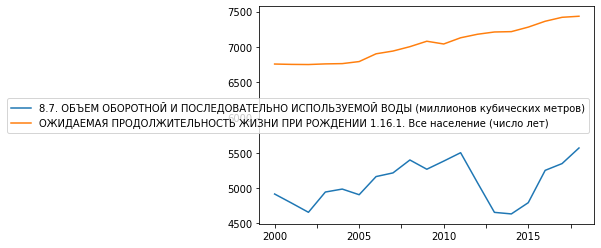

In [11]:
yy = data.copy()
yy["ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)"]*= 100
yy[['8.7. ОБЪЕМ ОБОРОТНОЙ И ПОСЛЕДОВАТЕЛЬНО ИСПОЛЬЗУЕМОЙ ВОДЫ (миллионов кубических метров)',
     'ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)']].plot.line()
plt.show()

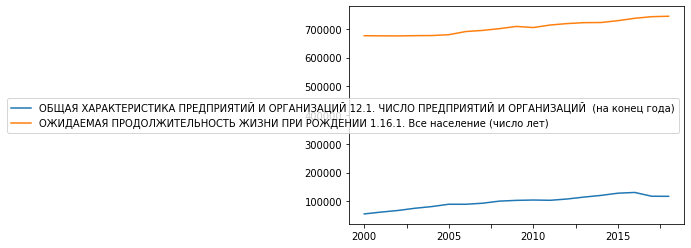

In [12]:
yy = data.copy()
yy["ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)"] *=10000
yy[['ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.1. ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ  (на конец года)',
     'ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)']].plot.line()
plt.show()

1.0.3  Согласованность данных

F-тест значимости

In [13]:
y_column = "ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)"
f_test, _ = f_regression(data.drop(labels=[y_column], axis=1)[features[:98]], data[y_column])
f_test /= np.max(f_test)

In [14]:
for i in range(len(f_test)):
    if f_test[i]>0.3:
        print (f_test[i], features[i])

0.7770381038746735 ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов  рублей)
0.5606487614481849 12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий
0.4846404012259538 12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения
0.32577486478260154 12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.1. Число малых предприятий в 2010, 2015 гг.
0.32577486478259343 12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.2. Число малых предприятий на 10 000 человек населения в 2010, 2015 гг.
0.325774865062765 12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.3. Среднесписочная численность работников  (без внешних совместителей) в  2010, 2015 гг.
0.43520641523402315 12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.4. Выручка от реализации товаров (работ, услуг) малых предприятий  в 2010, 2015 гг.
0.7533746076983362 12.7. КРЕДИТОРСКАЯ ЗАДОЛЖЕННОСТЬ ОРГАНИЗАЦИЙ 12.7.1. Всего
0.35956992160638507 12.8. ДЕБИТОРСКАЯ ЗАДОЛЖЕННОСТЬ ОРГАНИЗАЦИЙ 12.8.1.  Всего
1.0 12.12. ИТО

In [15]:
print (data[["12.12. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.12.3. Объем выручки от продажи товаров, продукции, работ, услуг"]])

      12.12. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.12.3. Объем выручки от продажи товаров, продукции, работ, услуг
2000                                           0.000000                                                      
2001                                           0.000000                                                      
2002                                           0.000000                                                      
2003                                          14.320543                                                      
2004                                          47.100617                                                      
2005                                          79.880690                                                      
2006                                         112.660764                                                      
2007                                         145.440838                                                      
2008      

Взаимная информация

In [16]:
mi = mutual_info_regression(data.drop(labels=[y_column], axis=1), data[y_column])
mi /= np.max(mi)

In [18]:
max_ff = 0
ff=''
for i in range(len(mi)):
    if i != list(features).index(y_column) and mi[i]>0.87:
        print (mi[i], features[i])
        if mi[i]>max_ff:
            max_ff=mi[i]
            ff=features[i]
print(max_ff, ff)

0.8821141245628167 12.8. ДЕБИТОРСКАЯ ЗАДОЛЖЕННОСТЬ ОРГАНИЗАЦИЙ 12.8.1.  Всего
0.8887884551276867 12.12. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.12.3. Объем выручки от продажи товаров, продукции, работ, услуг
0.8813361351104697 РОЗНИЧНАЯ ТОРГОВЛЯ 16.5. ОБОРОТ РОЗНИЧНОЙ ТОРГОВЛИ ПО ТОРГОВЫМ СЕТЯМ  (в фактически действовавших ценах; в процентах от общего объема оборота розничной торговли субъекта Российской Федерации)
0.9243302890559516 18.7. ИСПОЛЬЗОВАНИЕ СЕТИ ИНТЕРНЕТ НАСЕЛЕНИЕМ 18.7.1.  Население, использовавшее сеть Интернет2) (по данным выборочного обследования населения по вопросам использования ИКТ; в процентах от общей численности населения соответствующего субъекта Российской Федерации)
0.8928012428292649 18.7. ИСПОЛЬЗОВАНИЕ СЕТИ ИНТЕРНЕТ НАСЕЛЕНИЕМ 18.7.2. Население, использовавшее сеть Интернет каждый день или почти каждый день2) (по данным выборочного обследования населения по вопросам использования ИКТ; в процентах от общей численности населения соответствующего субъекта Российской 

In [19]:
data[[ff,y_column]]

,ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.2. Мужчины (число лет),ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)
2000,61.05,67.58
2001,60.89,67.53
2002,60.95,67.51
2003,61.05,67.60
2004,60.82,67.64
...,...,...
2014,66.39,72.17
2015,67.05,72.81
2016,68.15,73.64
2017,68.86,74.20


# Корреляция данных
Выделим факторы, которые более всего коррелируют с изменением целевого показателя

![Корреляция данных](correlation.jpg)

Нормализация данных

In [20]:
data = pd.DataFrame(MinMaxScaler().fit_transform(data))
data.columns = features
data.head(10)

,ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.1. ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ (на конец года),ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов рублей),12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.3. Среднесписочная численность работников (без внешних совместителей),12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.4. Оборот малых предприятий,"12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.1. Число малых предприятий в 2010, 2015 гг.","12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.2. Число малых предприятий на 10 000 человек населения в 2010, 2015 гг.","12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.3. Среднесписочная численность работников (без внешних совместителей) в 2010, 2015 гг.","12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.4. Выручка от реализации товаров (работ, услуг) малых предприятий в 2010, 2015 гг.",...,4.22. ЧИСЛО ФИЛИАЛОВ ОБРАЗОВАТЕЛЬНЫХ ОРГАНИЗАЦИЙ ВЫСШЕГО ОБРАЗОВАНИЯ (на начало учебного года),"4.23. ЧИСЛЕННОСТЬ ПРОФЕССОРСКО-ПРЕПОДАВАТЕЛЬСКОГО ПЕРСОНАЛА , ОСУЩЕСТВЛЯЮЩЕГО ОБРАЗОВАТЕЛЬНУЮ ДЕЯТЕЛЬНОСТЬ ПО ПРОГРАММАМ ВЫСШЕГО ОБРАЗОВАНИЯ (на начало учебного года; человек)","4.24. ЧИСЛЕННОСТЬ СТУДЕНТОВ, ОБУЧАЮЩИХСЯ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ (на начало учебного года; тысяч человек)","4.25. ЧИСЛЕННОСТЬ СТУДЕНТОВ, ОБУЧАЮЩИХСЯ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ на 10 000 человек населения (на начало учебного года; человек)","4.26. ПРИЕМ НА ОБУЧЕНИЕ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ (тысяч человек)","4.27. ВЫПУСК БАКАЛАВРОВ, СПЕЦИАЛИСТОВ, МАГИСТРОВ (тысяч человек)","4.28. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ АСПИРАНТОВ 4.28.1. Число организаций (на конец года)","4.28. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ АСПИРАНТОВ 4.28.2. Численность аспирантов (на конец года; человек)","4.29. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ ДОКТОРАНТОВ 4.29.1. Число организаций (на конец года)","4.29. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ ДОКТОРАНТОВ 4.29.2. Численность докторантов (на конец года; человек)"
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.5,0.453901
1,0.085716,0.000000,0.008395,0.043234,0.052010,0.000000,0.058462,0.058462,0.058462,0.000000,...,0.950834,0.945835,0.228175,0.225926,0.50625,0.093248,0.166667,0.135710,0.6,0.453901
2,0.160766,0.000000,0.065825,0.098528,0.104020,0.000000,0.116923,0.116923,0.116923,0.000000,...,0.901667,0.891671,0.432540,0.429630,0.50000,0.176849,0.583333,0.269543,0.7,0.489362
3,0.263245,0.023087,0.123254,0.153821,0.156030,0.000000,0.175385,0.175385,0.175385,0.000000,...,0.852501,0.837506,0.638889,0.637037,0.77500,0.292605,0.666667,0.402126,0.6,0.574468
4,0.342423,0.083656,0.180684,0.209115,0.208040,0.000000,0.233846,0.233846,0.233846,0.070488,...,0.850417,0.783342,0.792659,0.792593,0.85000,0.440514,0.833333,0.411507,0.6,0.531915
5,0.450100,0.171797,0.238114,0.264409,0.260049,0.000000,0.292308,0.292308,0.292308,0.141415,...,0.583619,0.729177,0.941468,0.940741,0.95625,0.540193,0.833333,0.376485,0.5,0.496454
6,0.449605,0.208053,0.295543,0.319702,0.312059,0.006489,0.350769,0.350769,0.350769,0.212342,...,0.566945,0.675013,1.000000,1.000000,1.00000,0.710611,1.000000,0.435897,0.5,0.560284
7,0.497923,0.277258,0.352973,0.374996,0.364069,0.082067,0.409231,0.409231,0.409231,0.283268,...,0.583619,0.620848,0.998016,0.996296,0.91875,0.836013,1.000000,0.524078,0.5,0.602837
8,0.596958,0.341322,0.410403,0.430290,0.416079,0.157646,0.467692,0.467692,0.467692,0.354195,...,0.566945,0.566683,0.957341,0.955556,0.63125,0.826367,1.000000,0.668543,0.6,0.609929
9,0.630685,0.342645,0.467832,0.485583,0.468089,0.233224,0.526154,0.526154,0.526154,0.425121,...,0.566945,0.512519,0.922619,0.914815,0.48750,0.900322,0.916667,0.752345,0.7,0.666667


### Корреляция факторов и целевого показателя
Линейная регрессия с одним фактором


In [21]:
y_column = "ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)"
y_columns = ["ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.2. Мужчины (число лет)",
            "ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.3. Женщины (число лет)"]
for column in data.columns:
    if column != y_column and column not in y_columns:
        x = np.array(data[column]).reshape(-1, 1)
        y = data[y_column]
        model = LinearRegression().fit(x, y)
        score = model.score(x, y)
        if score > 0.96:
            print (score, column)

0.9798688707851025 ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов  рублей)
0.9723141271341355 12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий
0.9681104931402057 12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения
0.9646164135574967 12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.4. Выручка от реализации товаров (работ, услуг) малых предприятий  в 2010, 2015 гг.
0.9792496728443599 12.7. КРЕДИТОРСКАЯ ЗАДОЛЖЕННОСТЬ ОРГАНИЗАЦИЙ 12.7.1. Всего
0.9842868173023633 12.12. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.12.3. Объем выручки от продажи товаров, продукции, работ, услуг
0.9693419407151636 ОСНОВНЫЕ ПОКАЗАТЕЛИ СЕЛЬСКОГО ХОЗЯЙСТВА 14.1. ПРОДУКЦИЯ СЕЛЬСКОГО ХОЗЯЙСТВА
0.9621723681760981 14.42. ОСНОВНЫЕ ПОКАЗАТЕЛИ ПО ВИДУ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ РЫБОЛОВСТВО  14.42.4. Удельный вес убыточных организаций в общем числе организаций по виду экономической деятельности Рыболовство2)
0.973163152809699 10.1. СТОИМОСТЬ ОСН

Линейная регрессия с L1-регуляризацией

In [21]:
for column in data.columns:
    if column != y_column and column not in y_columns:
        x = np.array(data[column]).reshape(-1, 1)
        y = data[y_column]
        model = Lasso(alpha=0.01).fit(x, y)
        score = model.score(x, y)
        if score > 0.96:
            print (score, column)

0.9710254516415432 ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов  рублей)
0.9640179778650475 12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий
0.9715314872025698 12.7. КРЕДИТОРСКАЯ ЗАДОЛЖЕННОСТЬ ОРГАНИЗАЦИЙ 12.7.1. Всего
0.9767724425126962 12.12. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.12.3. Объем выручки от продажи товаров, продукции, работ, услуг
0.9618478049671891 ОСНОВНЫЕ ПОКАЗАТЕЛИ СЕЛЬСКОГО ХОЗЯЙСТВА 14.1. ПРОДУКЦИЯ СЕЛЬСКОГО ХОЗЯЙСТВА
0.9648701219750462 10.1. СТОИМОСТЬ ОСНОВНЫХ ФОНДОВ  (на конец года; по полной учетной стоимости; миллионов рублей)
0.9656138694198542 РОЗНИЧНАЯ ТОРГОВЛЯ 16.1. ОБОРОТ РОЗНИЧНОЙ ТОРГОВЛИ (в фактически действовавших ценах; миллионов рублей)
0.9644917966373361 РОЗНИЧНАЯ ТОРГОВЛЯ 16.3. ОБОРОТ РОЗНИЧНОЙ ТОРГОВЛИ на душу населения (в фактически действовавших ценах; рублей)
0.9632762794580677 РОЗНИЧНАЯ ТОРГОВЛЯ 16.5. ОБОРОТ РОЗНИЧНОЙ ТОРГОВЛИ ПО ТОРГОВЫМ СЕТЯМ  (в фактически действовавших ценах; в процентах 

In [22]:
for column in data.columns:
    if column != y_column and column not in y_columns:
        x = np.array(data[column]).reshape(-1, 1)
        y = data[y_column]
        model = Ridge(alpha=0.3).fit(x, y)
        score = model.score(x, y)
        if score > 0.96:
            print (score, column)

0.9604063356542875 ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов  рублей)
0.9638882257314477 12.7. КРЕДИТОРСКАЯ ЗАДОЛЖЕННОСТЬ ОРГАНИЗАЦИЙ 12.7.1. Всего
0.9695537516275194 12.12. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.12.3. Объем выручки от продажи товаров, продукции, работ, услуг
0.9684453872614069 16.9. ОБЪЕМ ПЛАТНЫХ УСЛУГ НАСЕЛЕНИЮ 16.9.1. Всего
0.9667619944444362 16.9. ОБЪЕМ ПЛАТНЫХ УСЛУГ  16.9.2. На душу населения
0.9652043188317546 16.11. ОБЪЕМ ТРАНСПОРТНЫХ УСЛУГ НАСЕЛЕНИЮ 16.11.1. Всего
0.9623877349694562 16.11. ОБЪЕМ ТРАНСПОРТНЫХ УСЛУГ  16.11.2. На душу населения
0.9601918793349287 16.13. ОБЪЕМ КОММУНАЛЬНЫХ УСЛУГ 16.13.2. На душу населения
0.963396964390235 18.4. ЧИСЛО ПЕРСОНАЛЬНЫХ КОМПЬЮТЕРОВ на 100 РАБОТНИКОВ 18.4.2. Число персональных компьютеров с доступом к сети Интернет (штук)
0.9652136727367877 18.7. ИСПОЛЬЗОВАНИЕ СЕТИ ИНТЕРНЕТ НАСЕЛЕНИЕМ 18.7.2. Население, использовавшее сеть Интернет каждый день или почти каждый день2) (по данным выборочн

# Важность признаков
Выберем признаки, которые в наибольшей степени определяет решение регрессионной задачи при помощи решающих деревьев

![Важность признаков](feature_importance.png)

### Подключение библиотек

In [23]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

### Важность признаков
Применим решающие деревья и выберем наиболее существенные признаки

In [24]:
y_column = "ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)"
y_columns = ["ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.2. Мужчины (число лет)",
            "ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.3. Женщины (число лет)"]
y = data[y_column]
x = data.drop(labels=[y_column], axis=1).drop(labels=y_columns, axis=1)

In [25]:
rfr = RandomForestRegressor(n_estimators=250, random_state=17).fit(x, y)
print (rfr.feature_importances_)

[3.65649202e-03 1.05242968e-02 5.86875227e-04 1.34860602e-02
 9.04201296e-04 5.63073032e-04 1.21852823e-02 1.09093982e-02
 3.93612627e-03 9.19927116e-03 1.51301184e-04 3.38196405e-04
 2.68259983e-05 1.44536149e-05 5.35967398e-06 3.17395752e-03
 2.31292230e-05 3.03366149e-04 3.81219221e-03 4.97228561e-05
 4.65172171e-04 7.85025922e-03 1.43154887e-03 3.91924776e-03
 6.40137639e-03 1.00191788e-02 5.62168397e-05 3.23791843e-03
 3.71739179e-05 1.17480659e-03 7.11143698e-05 3.29416792e-03
 3.14052239e-05 3.71830320e-03 3.54490391e-03 6.35420586e-03
 6.82341832e-06 6.98737620e-09 8.00669480e-04 6.48483176e-04
 9.49144169e-06 2.59346250e-06 6.40764583e-06 5.04160445e-06
 3.42212369e-05 1.07429386e-03 7.58780635e-06 1.07908511e-04
 3.21341986e-04 8.39124825e-05 7.02785865e-08 9.08096004e-08
 7.54858832e-04 5.33307693e-05 3.91700646e-05 4.33163637e-06
 5.01541979e-05 3.70781788e-04 1.13764814e-03 6.91513679e-04
 3.17901307e-05 6.16987915e-05 7.20890233e-05 1.18530213e-04
 1.32362336e-05 1.687584

Используем правило локтя для определения числа важных признаков

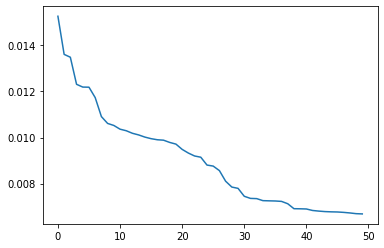

In [26]:
plt.plot(rfr.feature_importances_[np.argsort(rfr.feature_importances_)[::-1]][:50])
plt.show()

Выведем важные признаки

In [29]:
features[np.argsort(rfr.feature_importances_)[::-1][:6]]

array(['13.5. ИНДЕКСЫ ПРОИЗВОДСТВА  по виду экономической деятельности «Обрабатывающие производства» 13.5.2. В соответствии с ОКВЭД2 (в процентах к предыдущему году)',
       '9.6. ВАЛОВОЕ НАКОПЛЕНИЕ ОСНОВНОГО КАПИТАЛА в 2000-2015 гг. ;2) (в текущих рыночных ценах; миллионов рублей)',
       '12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения',
       '20.11. ВКЛАДЫ (ДЕПОЗИТЫ) ФИЗИЧЕСКИХ ЛИЦ НА РУБЛЕВЫХ СЧЕТАХ В СБЕРБАНКЕ РОССИИ (на начало года; миллионов рублей)',
       'ЖИВОТНОВОДСТВО 14.35. ПРОИЗВОДСТВО МЕДА',
       '12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.1. Число малых предприятий в 2010, 2015 гг.'],
      dtype=object)

Повторим все со сверх случайными деревьями

In [30]:
etr = ExtraTreesRegressor(n_estimators=250, random_state=17).fit(x, y)
features[np.argsort(etr.feature_importances_)[::-1][:6]]

array(['ЖИЛИЩНЫЕ УСЛОВИЯ НАСЕЛЕНИЯ 3.26. УДЕЛЬНЫЙ ВЕС АВАРИЙНОГО ЖИЛИЩНОГО ФОНДА В ОБЩЕЙ ПЛОЩАДИ ВСЕГО ЖИЛИЩНОГО ФОНДА (в процентах)',
       'СТРОИТЕЛЬНАЯ ДЕЯТЕЛЬНОСТЬ 15.1. ЧИСЛО ДЕЙСТВУЮЩИХ СТРОИТЕЛЬНЫХ ОРГАНИЗАЦИЙ  (на конец года)',
       '4.2. ВАЛОВОЙ КОЭФФИЦИЕНТ ОХВАТА ДОШКОЛЬНЫМ ОБРАЗОВАНИЕМ (на конец года;  в процентах от численности детей в возрасте 1-6 лет)',
       '18.1. ИСПОЛЬЗОВАНИЕ ИНФОРМАЦИОННЫХ И КОММУНИКАЦИОННЫХ ТЕХНОЛОГИЙ В ОРГАНИЗАЦИЯХ  18.1.4. Организации, использовавшие глобальные информационные сети (в процентах от общего числа обследованных организаций  соответствующего субъекта Российской федерации)',
       '17.2. ОТПРАВЛЕНИЕ  ПАССАЖИРОВ ЖЕЛЕЗНОДОРОЖНЫМ ТРАНСПОРТОМ ОБЩЕГО ПОЛЬЗОВАНИЯ (тысяч человек)',
       '4.7. УДЕЛЬНЫЙ ВЕС ОБУЧАЮЩИХСЯ ВО ВТОРУЮ И ТРЕТЬЮ СМЕНЫ В ОРГАНИЗАЦИЯХ, ОСУЩЕСТВЛЯЮЩИХ ОБРАЗОВАТЕЛЬНУЮ ДЕЯТЕЛЬНОСТЬ ПО ОБРАЗОВАТЕЛЬНЫМ ПРОГРАММАМ НАЧАЛЬНОГО, ОСНОВНОГО И СРЕДНЕГО ОБЩЕГО ОБРАЗОВАНИЯ (на начало учебного года; в процентах от общей численност

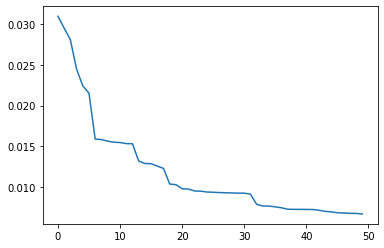

In [31]:
plt.plot(etr.feature_importances_[np.argsort(etr.feature_importances_)[::-1]][:50])
plt.show()